In [70]:
%matplotlib inline
import matplotlib.pyplot as plt

import tensorflow as tf
import numpy as np
import importlib
from os.path import expanduser, join

import task
from task import generate_trials

import train
from train import get_default_hp

from network import Model

import my_rnn_functions as mrnn
importlib.reload(mrnn)

<module 'my_rnn_functions' from '/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/my_rnn_functions.py'>

In [123]:
home = expanduser('~')
saving_path = join(home,'My_scripts_Local/Models_Local/ThalRNN/saved_models/')
model_name = 'fully_connected_RNN_ctx_multi_sensory_delay_relu_seed_1'
model_dir=join(saving_path,model_name)


In [124]:
importlib.reload(mrnn)
model_data = mrnn.get_model_data(model_dir)


No weight mask used.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(568, 500) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(500,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(500, 33) dtype=float32>
<tf.Variable 'output/biases:0' shape=(33,) dtype=float32>
Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/fully_connected_RNN_ctx_multi_sensory_delay_relu_seed_1/model.ckpt
Model hp restored.

No weight mask used.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(568, 500) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(500,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(500, 33) dtype=float32>
<tf.Variable 'output/biases:0' shape=(33,) dtype=float32>
Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/fully_connected_RNN_ctx_multi_sensory_delay_relu_seed_1/model.ckpt


In [95]:
importlib.reload(mrnn)

<module 'my_rnn_functions' from '/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/my_rnn_functions.py'>

100.0% of weights trained.


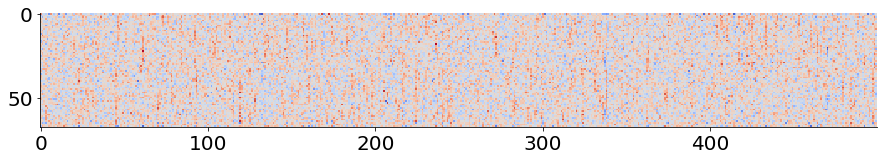

In [125]:
w_type = 'input'
mrnn.plot_weight_matrix(model_data,w_type,abs_weights=False)


100.0% of weights trained.


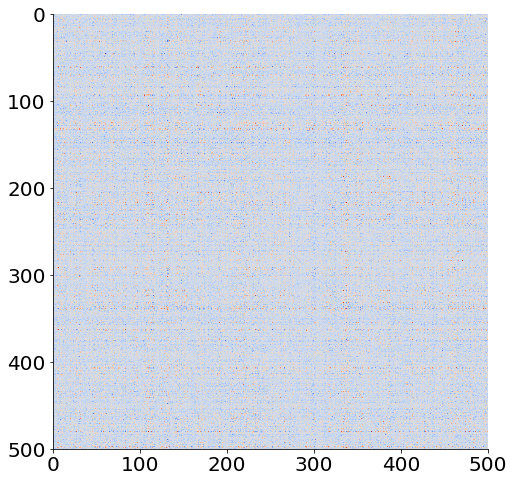

In [126]:
w_type = 'hidden'
mrnn.plot_weight_matrix(model_data,w_type,abs_weights=False)


100.0% of weights trained.


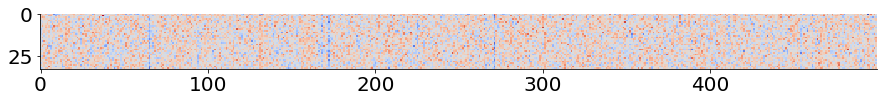

In [127]:
w_type = 'output'
mrnn.plot_weight_matrix(model_data,w_type,abs_weights=False)


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/basic_TC_model_ctx_multi_sensory_delay_relu_seed_1
/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/basic_TC_model_ctx_multi_sensory_delay_relu_seed_2
/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/basic_TC_model_ctx_multi_sensory_delay_relu_seed_3


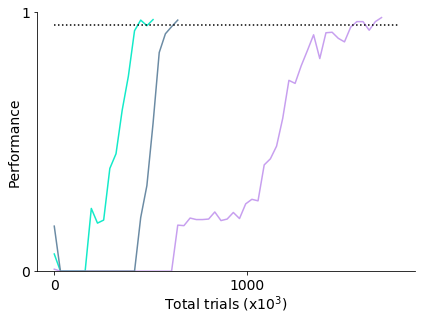

<Figure size 1080x432 with 0 Axes>

In [91]:
importlib.reload(mrnn)

trained_models = ['basic_TC_model_ctx_multi_sensory_delay_relu_seed_1',
                  'basic_TC_model_ctx_multi_sensory_delay_relu_seed_2',
                  'basic_TC_model_ctx_multi_sensory_delay_relu_seed_3'
                 ]

rules = ['multidelaydm'] # ['contextdelaydm1', 'multidelaydm', 'contextdelaydm2'] ['contextdm1', 'multidelaydm', 'contextdm2'] #model_data['hp']['rules']


mrnn.plt_various_performances(trained_models,models_saving_dir=saving_path,rules=rules, show_legend=True,labels=None)


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/basic_TC_model_ctx_multi_sensory_delay_relu_seed_1
/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/sparse_control_RNN_ctx_multi_sensory_delay_relu_seed_1
/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/fully_connected_RNN_ctx_multi_sensory_delay_relu_seed_1


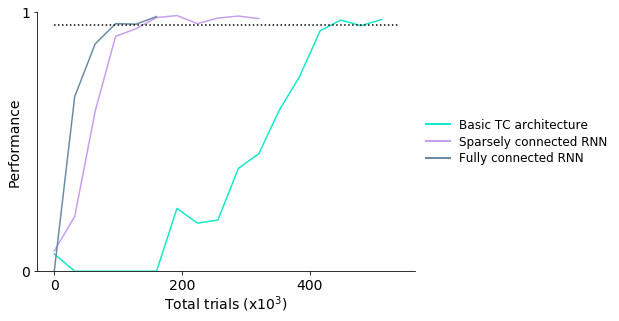

<Figure size 1080x432 with 0 Axes>

In [79]:
importlib.reload(mrnn)

trained_models = ['basic_TC_model_ctx_multi_sensory_delay_relu_seed_1',
                 'sparse_control_RNN_ctx_multi_sensory_delay_relu_seed_1',
                  'fully_connected_RNN_ctx_multi_sensory_delay_relu_seed_1'
                 ]

rules = ['multidelaydm'] # ['contextdelaydm1', 'multidelaydm', 'contextdelaydm2'] ['contextdm1', 'multidelaydm', 'contextdm2'] #model_data['hp']['rules']

labels = ['Basic TC architecture',
          'Sparsely connected RNN',
          'Fully connected RNN'
         ]

mrnn.plt_various_performances(trained_models,models_saving_dir=saving_path,rules=rules, show_legend=True,labels=labels)


In [121]:
importlib.reload(mrnn)
print(model_name)

rule = 'multidelaydm' #contextdelaydm1 multidelaydm contextdelaydm2

stim1_mod1 = np.array([1])
stim1_mod2 = np.array([0])
stim2_mod1 = np.array([0])
stim2_mod2 = np.array([0])

basic_TC_model_ctx_multi_sensory_delay_relu_seed_1



No weight mask used.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(568, 500) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(500,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(500, 33) dtype=float32>
<tf.Variable 'output/biases:0' shape=(33,) dtype=float32>
Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/fully_connected_RNN_ctx_multi_sensory_delay_relu_seed_1/model.ckpt

No weight mask used.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(568, 500) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(500,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(500, 33) dtype=float32>
<tf.Variable 'output/biases:0' shape=(33,) dtype=float32>
Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/fully_connected_RNN_ctx_multi_sensory_delay_relu_seed_1/model.ckpt
Model hp restored.

No weight mask used.

Vari

/Users/svasquez91/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


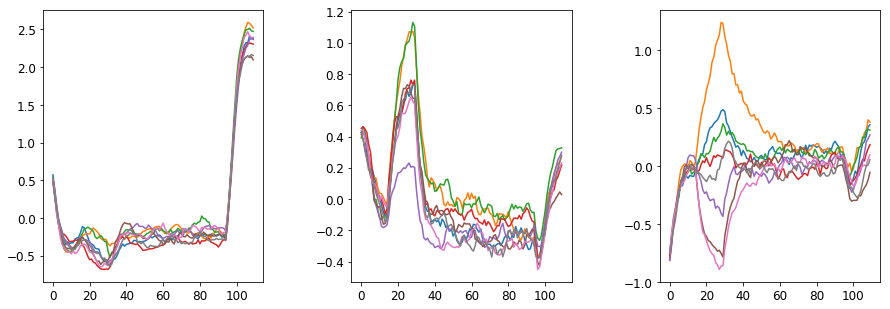

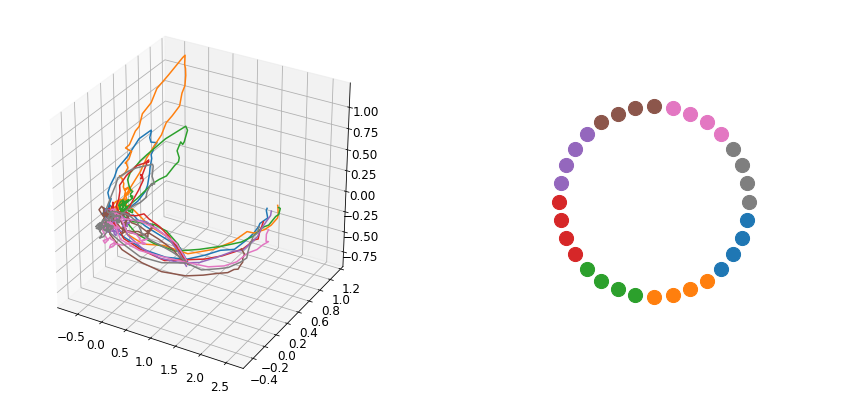

In [128]:
mrnn.PCA_activity(model_dir,rule,stim1_mod1, stim2_mod1, stim1_mod2, stim2_mod2)


Basic TC weight mask used.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(568, 500) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(500,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(500, 33) dtype=float32>
<tf.Variable 'output/biases:0' shape=(33,) dtype=float32>
Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/basic_TC_model_ctx_multi_sensory_delay_relu_seed_1/model.ckpt

Basic TC weight mask used.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(568, 500) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(500,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(500, 33) dtype=float32>
<tf.Variable 'output/biases:0' shape=(33,) dtype=float32>
Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/basic_TC_model_ctx_multi_sensory_delay_relu_seed_1/model.ckpt
Model hp restored.

Basic TC weight mask use

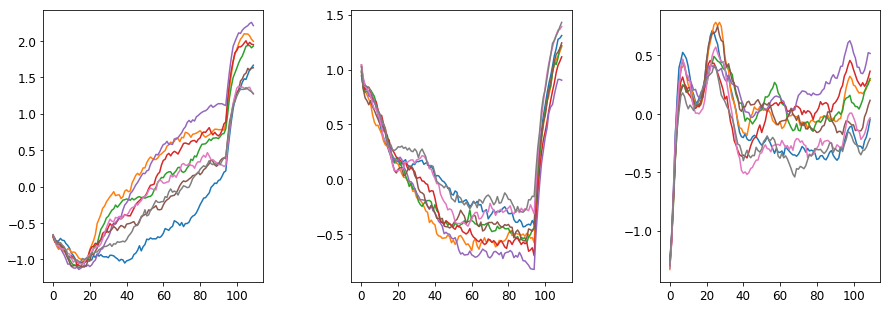

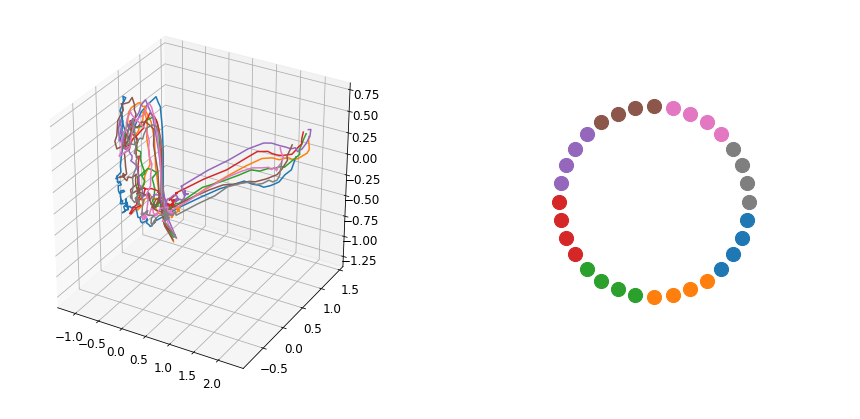

In [122]:
mrnn.PCA_activity(model_dir,rule,stim1_mod1, stim2_mod1, stim1_mod2, stim2_mod2, subsample_indexes=range(0,100))


Basic TC weight mask used.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(568, 500) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(500,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(500, 33) dtype=float32>
<tf.Variable 'output/biases:0' shape=(33,) dtype=float32>
Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/basic_TC_model_ctx_multi_sensory_delay_relu_seed_1/model.ckpt

Basic TC weight mask used.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(568, 500) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(500,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(500, 33) dtype=float32>
<tf.Variable 'output/biases:0' shape=(33,) dtype=float32>
Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/basic_TC_model_ctx_multi_sensory_delay_relu_seed_1/model.ckpt
Model hp restored.

Basic TC weight mask use

/Users/svasquez91/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


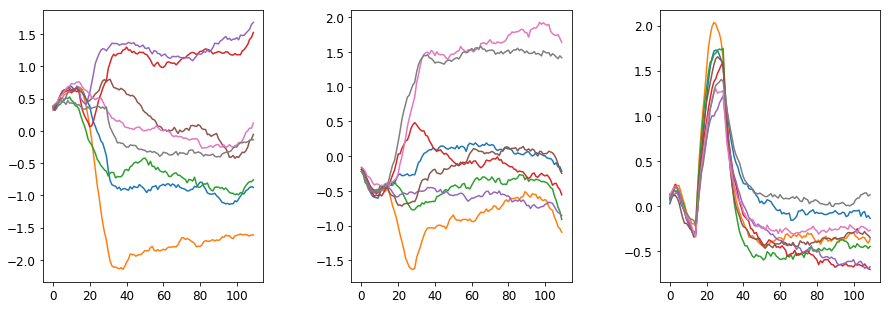

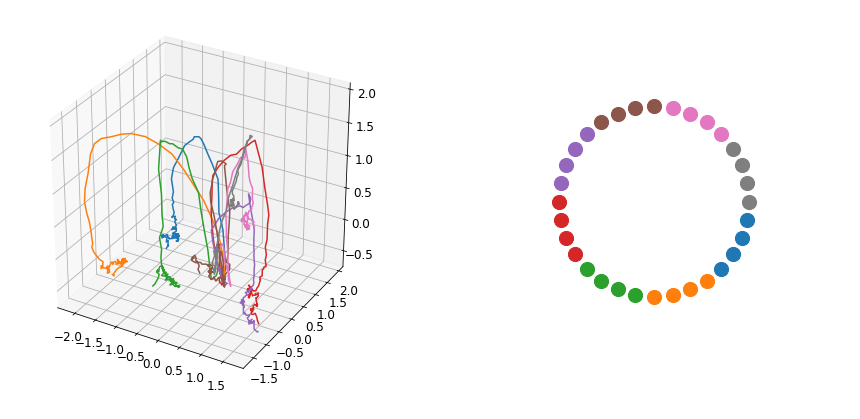

In [109]:
mrnn.PCA_activity(model_dir,rule,stim1_mod1, stim2_mod1, stim1_mod2, stim2_mod2, subsample_indexes=range(100,200))


Basic TC weight mask used.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(568, 500) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(500,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(500, 33) dtype=float32>
<tf.Variable 'output/biases:0' shape=(33,) dtype=float32>
Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/basic_TC_model_ctx_multi_sensory_delay_relu_seed_1/model.ckpt

Basic TC weight mask used.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(568, 500) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(500,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(500, 33) dtype=float32>
<tf.Variable 'output/biases:0' shape=(33,) dtype=float32>
Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/basic_TC_model_ctx_multi_sensory_delay_relu_seed_1/model.ckpt
Model hp restored.

Basic TC weight mask use

/Users/svasquez91/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


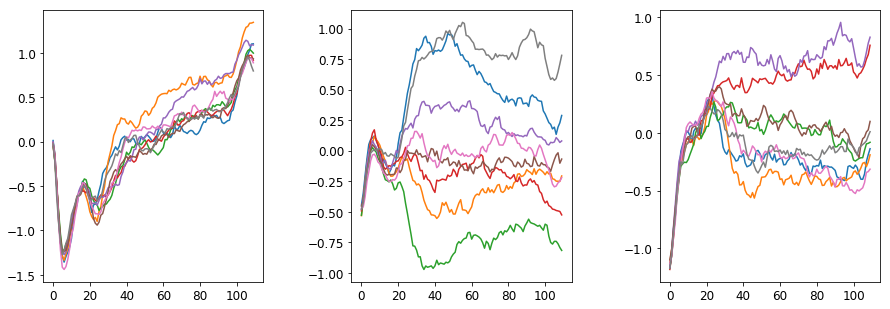

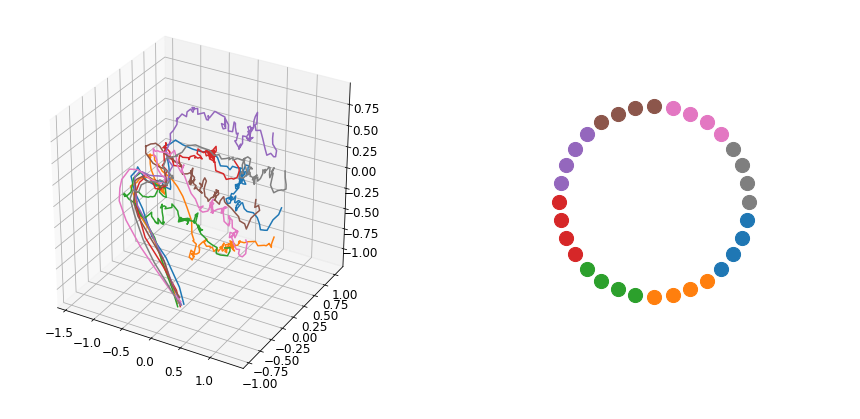

In [110]:
mrnn.PCA_activity(model_dir,rule,stim1_mod1, stim2_mod1, stim1_mod2, stim2_mod2, subsample_indexes=range(200,300))


Basic TC weight mask used.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(568, 500) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(500,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(500, 33) dtype=float32>
<tf.Variable 'output/biases:0' shape=(33,) dtype=float32>
Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/basic_TC_model_ctx_multi_sensory_delay_relu_seed_1/model.ckpt

Basic TC weight mask used.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(568, 500) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(500,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(500, 33) dtype=float32>
<tf.Variable 'output/biases:0' shape=(33,) dtype=float32>
Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/basic_TC_model_ctx_multi_sensory_delay_relu_seed_1/model.ckpt
Model hp restored.

Basic TC weight mask use

/Users/svasquez91/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


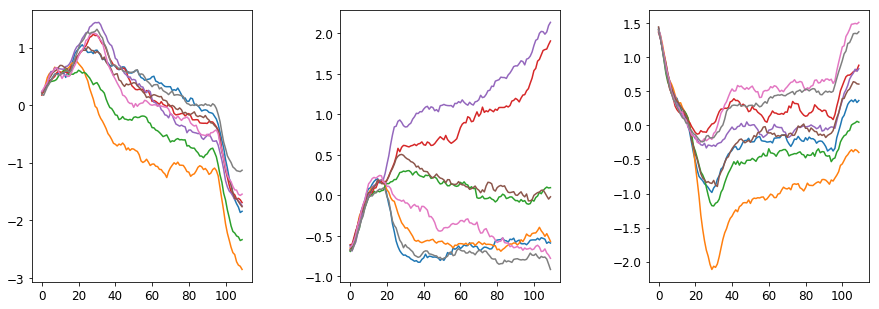

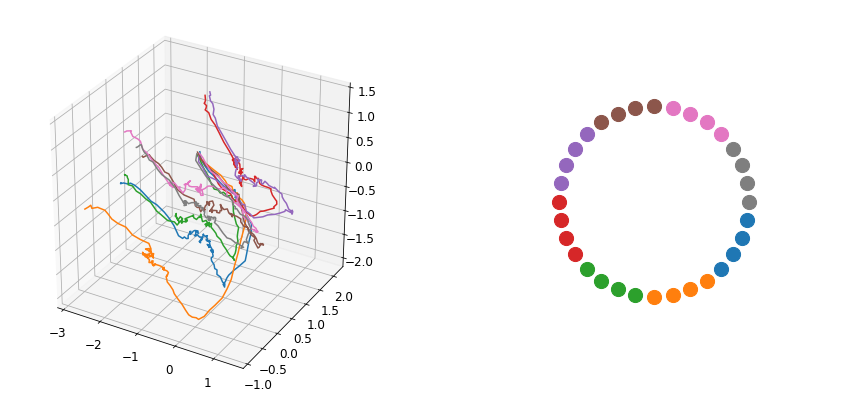

In [111]:
mrnn.PCA_activity(model_dir,rule,stim1_mod1, stim2_mod1, stim1_mod2, stim2_mod2, subsample_indexes=range(400,500))